# Task 3

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')


In [8]:
df = pd.read_excel("bank-direct-marketing.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# Drop irrelevant column
df.drop(columns=['duration'], inplace=True, errors='ignore')

# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Feature/Target split
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# Train a Decision Tree Classifier

In [24]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9021607186210245

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.68      0.25      0.36       928

    accuracy                           0.90      8238
   macro avg       0.80      0.62      0.66      8238
weighted avg       0.89      0.90      0.88      8238



# Visualize the Decision Tree

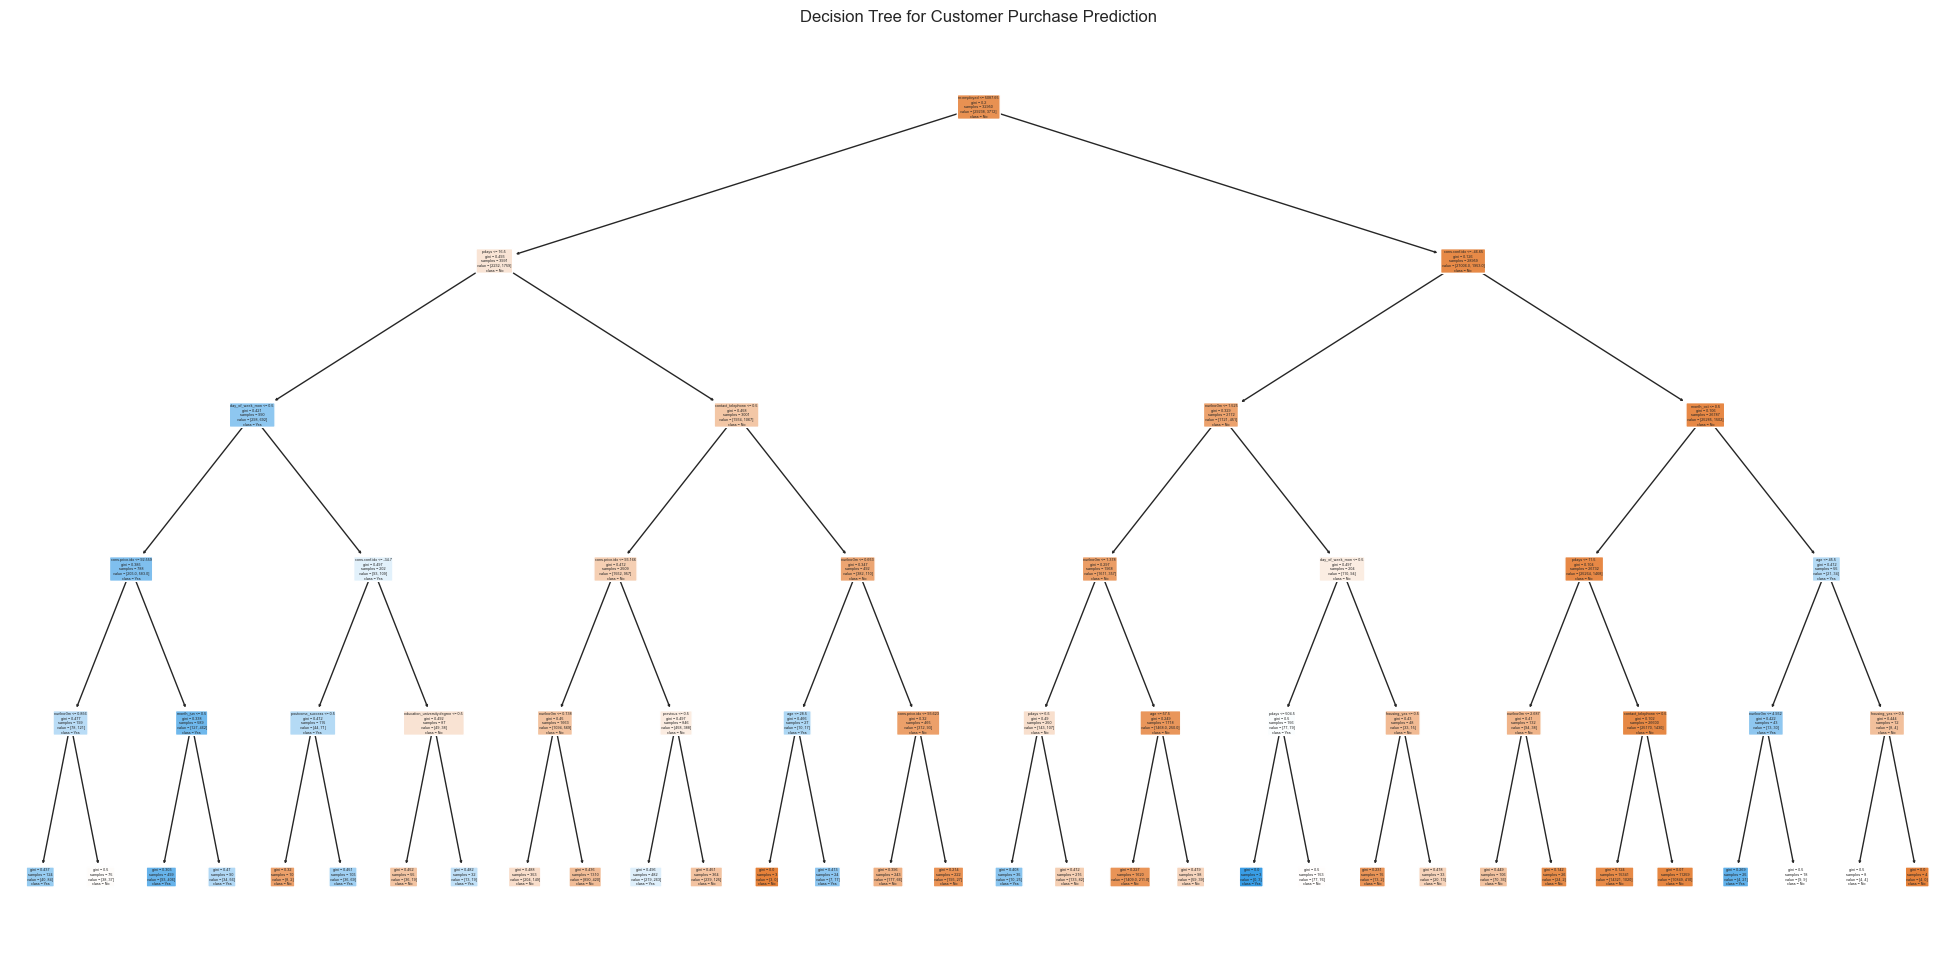

In [13]:
plt.figure(figsize=(25, 12))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree for Customer Purchase Prediction")
plt.show()


# Train a Random Forest Classifier

In [16]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9031318281136198
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.72      0.23      0.35       928

    accuracy                           0.90      8238
   macro avg       0.81      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238



# Apply SMOTE for Balancing

In [18]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_smote.fit(X_resampled, y_resampled)
y_pred_smote = rf_smote.predict(X_test)

print("Random Forest with SMOTE Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Random Forest with SMOTE Accuracy: 0.8708424374848264
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7310
           1       0.45      0.61      0.52       928

    accuracy                           0.87      8238
   macro avg       0.70      0.76      0.72      8238
weighted avg       0.89      0.87      0.88      8238



# Plot Confusion Matrix

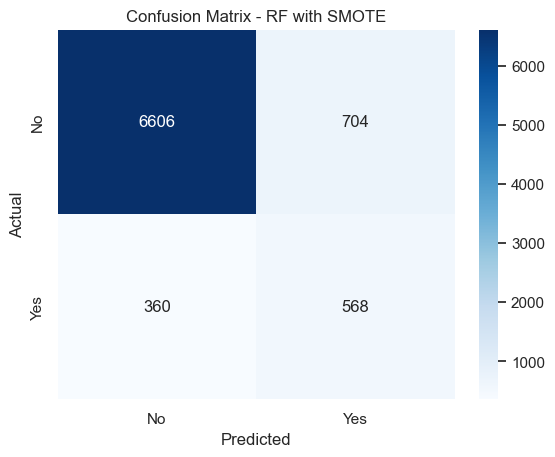

In [20]:
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF with SMOTE")
plt.show()
